# Applied Data Science capstone

## Predicting severe accidents using data from Seattle City

Steven Wambua

# Introduction
## Problem statement
The deaths and injuries from traffic accidents are now a world phenomenon. Many countries all over the world are greatly concerned about the growth of mortality and injury rate on the road. According to WHO, every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury. 
Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.
## Target audience
Motorists, people who use public transport, police and medical personnel are usually inconvenienced greatly when accidents occur and especially severe accidents. For, severe accidents it takes quite some time and resources for the police and medical personnel to clear the scene. This thus leads to many hours of wait. Students are likely to be late for their classes, people going for interviews get late, those expected in important meetings may not be able to attend, surgeons and doctors expected to save lives run late, just to name but a few. Although severe accidents are unexpected, it would be possible to build a machine learning algorithm to predict severe accidents using various factors that are determined to be related to a severe accident occurring. This would thus serve as an automated reference to help people make decisions where and when there is a high chance of a severe accident occurring and hence plan accordingly. 
## Scope and main aim
Factors influencing accident frequency may vary from the ones affecting the severity; hence, it is suggested that their analysis should be performed carefully. A set of explanatory variables, which could include: driver attributes (e.g., age and gender, whether under influence of alcohol), vehicle features (e.g., body type, vehicle age and number of vehicles involved in the accident), road characteristics (e.g., number of lanes, road surface conditions, intersection control and types of road), weather conditions, day of week, time of day, speed limit and accident characteristics (e.g., accident’s main cause) have been shown to be possible predictors of accident severity. 
The aim of this project is therefore to develop a machine learning algorithm that would warn motorists and other people using public transport where and when there is a high chance that a severe accident would occur and hence help them plan accordingly to avoid delays and inconveniences.

# Data description
To evaluate the objectives of this project, a dataset by SDOT Traffic Management Divisions, Traffic Records Group in Seattle was downloaded using this link. This data is updated weekly and captures all types of collisions since 2004 to present. A record of severity of the collision, “SEVERITYCODE” is provided alongside other 39 variables related to a given collision. The dataset has a record of 221266 collisions. 

Columns that are not providing much information on the model such as ID, KEY etc will be dropped. For the purpose of this project, we will explore the various variables and select features that we would use in the prediction based on their importance in predicting severity of an accident. Through feature engineering more variables will be obtained to ensure good prediction of our model.

The target variable is ‘SEVERITYCODE’, which captures the various categories of severity of the accident as follows; 0 – Unknown, 1 – prop damage, 2 – injury, 2b – severe injury and 3 – fatality. 

After the data has been balanced, exploratory data analysis will be carried out to identify relationships between the various characteristics in the dataset with the target variable, severity of accident. Missing data will also be investigated and corrected. A set of predictions will also be identified to use in the prediction model. Since our data is labeled, supervised machine learning techniques will be used. The data will be split into training and test sets for training and validation. Since our target variable is likely to be binary after balancing the data, classification models will be evaluated to select the best classifier. The following classification models will be evaluated; K – nearest neighbor, Naïve Bayes, Random Forest, Logistic Regression, Gradient Boosting, XGBoost and Support Vector Machines. Various measures of accuracy such as Jaccard index, F1 score and log loss will be used to select the best classification model.

In [91]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

body = client_ea32a63fc58144eda8d61db1e85eccf0.get_object(Bucket='final-donotdelete-pr-hwcacbenaxnunb',Key='Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_cols = pd.read_csv(body)
df_cols.head()


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [92]:

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [93]:
df_cols.shape

(221266, 40)

In [94]:
print(list(df_cols))

['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [95]:
df_cols.SEVERITYDESC.value_counts()/len(df_cols)

Property Damage Only Collision    0.621356
Injury Collision                  0.265283
Unknown                           0.097783
Serious Injury Collision          0.014001
Fatality Collision                0.001577
Name: SEVERITYDESC, dtype: float64

In [96]:
df_cols.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,71823.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221265.000000,1.272050e+05,221266.000000,2.212660e+05
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,37616.272768,2.226230,0.038103,0.027293,1.728544,0.373844,0.015149,0.001681,13.383558,7.971063e+06,261.441573,9.588454e+03
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,51905.450406,1.470364,0.201745,0.164345,0.831224,0.732086,0.157908,0.044562,7.302961,2.611523e+06,3248.850406,7.150262e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221266.000000,333683.000000,335183.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [97]:
df_cols.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [98]:
#names of columns
df_cols.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [99]:
#drop columns that are repetitions of already coded variables
df_cols.drop(['X', 'Y', 'OBJECTID','INCKEY','COLDETKEY','REPORTNO','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','SDOT_COLDESC','ST_COLDESC','STATUS'], axis=1, inplace=True)

# Data cleaning and pre - processing 

## Missing values

In [100]:
df_cols.isnull().sum()

ADDRTYPE             3712
INTKEY             149443
LOCATION             4586
SEVERITYCODE            1
COLLISIONTYPE       26499
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11967
SDOT_COLCODE            1
INATTENTIONIND     191078
UNDERINFL           26479
WEATHER             26688
ROADCOND            26608
LIGHTCOND           26776
PEDROWNOTGRNT      216078
SDOTCOLNUM          94061
SPEEDING           211353
ST_COLCODE           9413
SEGLANEKEY              0
CROSSWALKKEY            0
HITPARKEDCAR            0
dtype: int64

In [101]:
df_cols.isnull().sum()/len(df_cols)

ADDRTYPE           0.016776
INTKEY             0.675400
LOCATION           0.020726
SEVERITYCODE       0.000005
COLLISIONTYPE      0.119761
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
INJURIES           0.000000
SERIOUSINJURIES    0.000000
FATALITIES         0.000000
INCDATE            0.000000
INCDTTM            0.000000
JUNCTIONTYPE       0.054084
SDOT_COLCODE       0.000005
INATTENTIONIND     0.863567
UNDERINFL          0.119670
WEATHER            0.120615
ROADCOND           0.120253
LIGHTCOND          0.121013
PEDROWNOTGRNT      0.976553
SDOTCOLNUM         0.425104
SPEEDING           0.955199
ST_COLCODE         0.042542
SEGLANEKEY         0.000000
CROSSWALKKEY       0.000000
HITPARKEDCAR       0.000000
dtype: float64

In [16]:
import sys
!{sys.executable} -m pip install missingno
import missingno as msno 

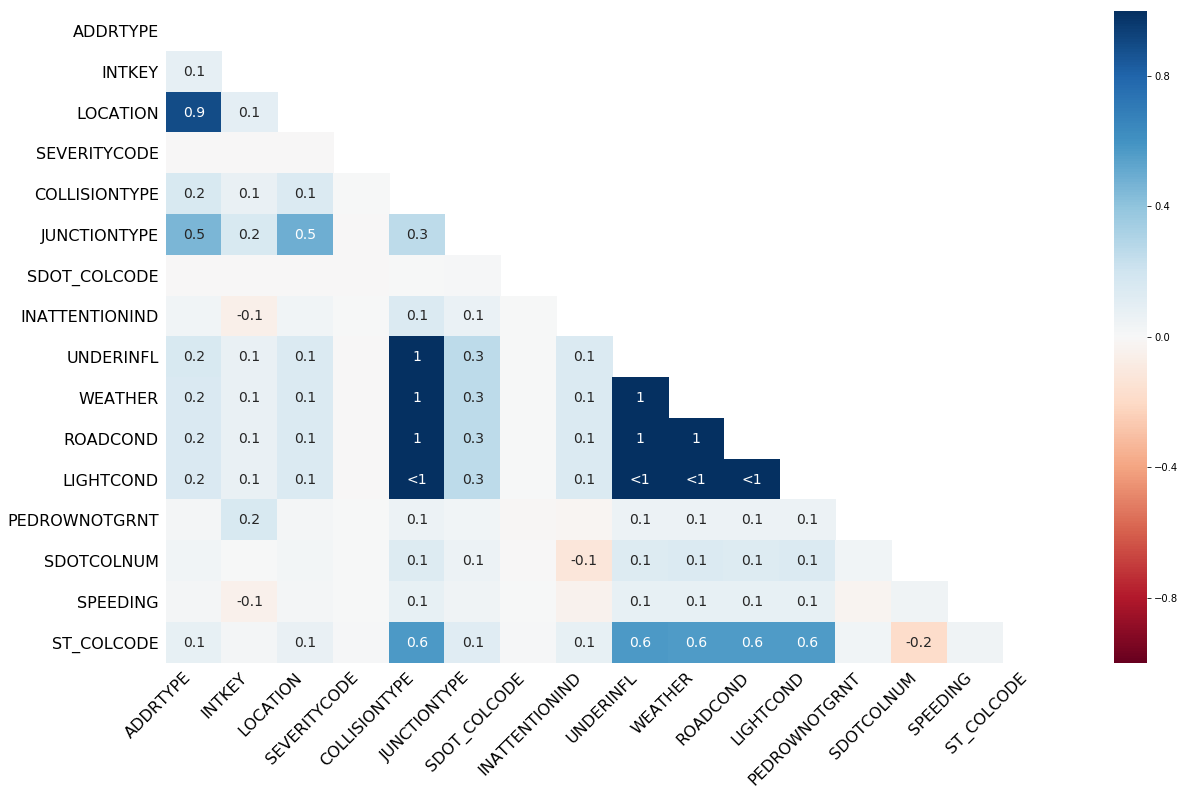

In [102]:
msno.heatmap(df_cols) 

In [103]:
#delete row where SEVERITYCODE our target is na
df_cols = df_cols[df_cols['SEVERITYCODE'].notna()]
#drop more columns that have high missingness
df_cols.drop(['INTKEY','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING'], axis=1, inplace=True)

In [104]:
df_cols.shape   #we now have less one row

(221265, 23)

In [105]:
df_cols.isnull().sum()

ADDRTYPE            3712
LOCATION            4586
SEVERITYCODE           0
COLLISIONTYPE      26498
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE       11967
SDOT_COLCODE           1
UNDERINFL          26479
WEATHER            26688
ROADCOND           26608
LIGHTCOND          26776
ST_COLCODE          9412
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [106]:
#Replacing missing values with the most frequent values in each column with a missing value

# replacing na values in ADDRTYPE with Block which is the most frequent
df_cols["ADDRTYPE"].fillna("Block", inplace = True)

# replacing na values in LOCATION with BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N which is the most frequent
df_cols["LOCATION"].fillna("BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N", inplace = True)

# replacing na values in COLLISIONTYPE with Other 
df_cols["COLLISIONTYPE"].fillna("Other", inplace = True)

# replacing na values in JUNCTIONTYPE with Unknown 
df_cols["JUNCTIONTYPE"].fillna("Unknown", inplace = True)

# replacing na values in UNDERINFL with No 
df_cols["UNDERINFL"].fillna("N", inplace = True)

# replacing na values in WEATHER with Clear
df_cols["WEATHER"].fillna("Clear", inplace = True)

# replacing na values in ROADCOND with Dry
df_cols["ROADCOND"].fillna("Dry", inplace = True)

# replacing na values in LIGHTCOND with Daylight
df_cols["LIGHTCOND"].fillna("Daylight", inplace = True)

# replacing na values in ST_COLCODE with 32
df_cols["ST_COLCODE"].fillna(32, inplace = True)

# replacing na values in SDOT_COLCODE with 11.0
df_cols["SDOT_COLCODE"].fillna(11.0, inplace = True)

In [107]:
#checking our data is now complete
df_cols.isnull().sum()/len(df_cols)

ADDRTYPE           0.0
LOCATION           0.0
SEVERITYCODE       0.0
COLLISIONTYPE      0.0
PERSONCOUNT        0.0
PEDCOUNT           0.0
PEDCYLCOUNT        0.0
VEHCOUNT           0.0
INJURIES           0.0
SERIOUSINJURIES    0.0
FATALITIES         0.0
INCDATE            0.0
INCDTTM            0.0
JUNCTIONTYPE       0.0
SDOT_COLCODE       0.0
UNDERINFL          0.0
WEATHER            0.0
ROADCOND           0.0
LIGHTCOND          0.0
ST_COLCODE         0.0
SEGLANEKEY         0.0
CROSSWALKKEY       0.0
HITPARKEDCAR       0.0
dtype: float64

## Change date variables to date time

In [108]:
#changing dates to a date formart
df_cols['INCDATE'] = pd.to_datetime(df_cols['INCDATE'])
df_cols['INCDTTM'] = pd.to_datetime(df_cols['INCDTTM'])

In [109]:
df_cols[['INCDATE','INCDTTM']].dtypes     #dates are now in the right format

INCDATE    datetime64[ns, UTC]
INCDTTM         datetime64[ns]
dtype: object

# Recoding Target to binary

In [110]:
#df_cols = df_cols[df_cols.SEVERITYCODE != "0"] #drop unknown as it is uncertain

df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['0'],0)   #prop damage category
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['1'],1)   #prop damage category
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['2'],2)   #injury
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['2b'],3)  #severe injury
df_cols['SEVERITYCODE'] = df_cols['SEVERITYCODE'].replace(['3'],4)   #fatality

df_cols.SEVERITYCODE.value_counts()/len(df_cols)


1    0.621359
2    0.265284
0    0.097779
3    0.014001
4    0.001577
Name: SEVERITYCODE, dtype: float64

Accidents classified in each level of severity:
1    137485
2     58698
0     21635
3      3098
4       349
Name: SEVERITYCODE, dtype: int64


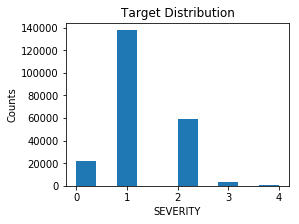

In [111]:
df_cols.SEVERITYCODE.plot.hist(figsize=(4,3))
plt.title('Target Distribution')
plt.xlabel('SEVERITY')
plt.ylabel('Counts')
print('Accidents classified in each level of severity:')
print(df_cols.SEVERITYCODE.value_counts())

## Exploratory analysis and data visualization

In [112]:
#creating an ID
#df_cols.insert(0, 'ID', range(1,len(df_cols)))
df_cols.reset_index(level=0, inplace=True)
df_cols['ID'] = df_cols.index

In [113]:
df_cols.shape

(221265, 25)

In [114]:
date=df_cols[['ID','SEVERITYCODE', 'INCDATE']]
date.INCDATE.head()

0   2019-11-20 00:00:00+00:00
1   2019-11-18 00:00:00+00:00
2   2020-02-20 00:00:00+00:00
3   2004-06-08 00:00:00+00:00
4   2004-10-15 00:00:00+00:00
Name: INCDATE, dtype: datetime64[ns, UTC]

## Temporal trends of accidents since 2004

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

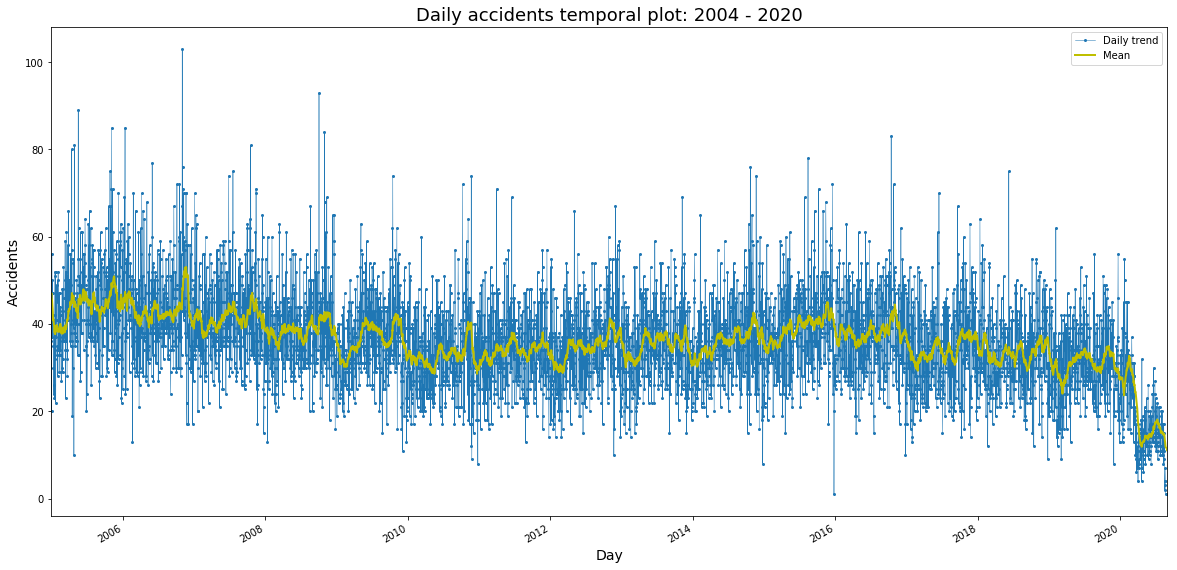

In [115]:
#Temporal plots
date['year'] = df_cols['INCDATE'].dt.year
date['month'] = df_cols['INCDATE'].dt.month
date['weekday'] = df_cols['INCDATE'].dt.weekday
date['time'] = df_cols['INCDATE'].dt.time
high_sev = date[date['SEVERITYCODE']==1]

season = date[['INCDATE', 'ID']].groupby('INCDATE').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*1:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*1:].plot(color='y', linewidth=2, label='Mean')
plt.title('Daily accidents temporal plot: 2004 - 2020', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

plt.legend()
plt.show()

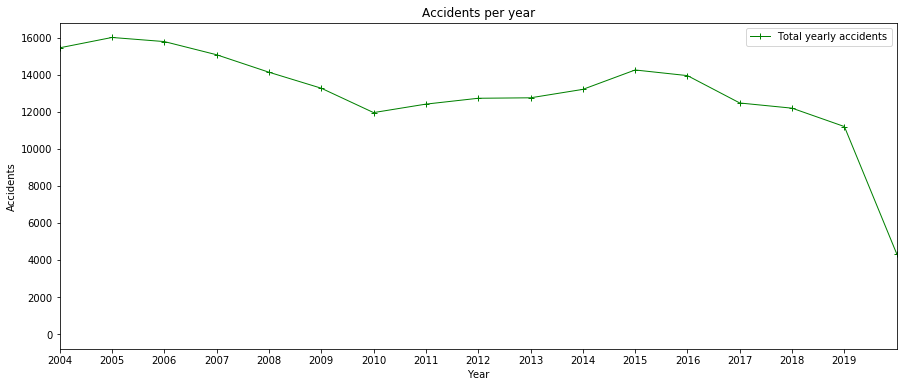

In [116]:
#Accidents each year
yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(15,6), marker='+', linewidth=1, color='green', label='Total yearly accidents')
plt.title('Accidents per year')
plt.xticks(range(2004,2020))
plt.xlim(2004,2020)
plt.ylabel('Accidents')
plt.xlabel('Year')
plt.legend()

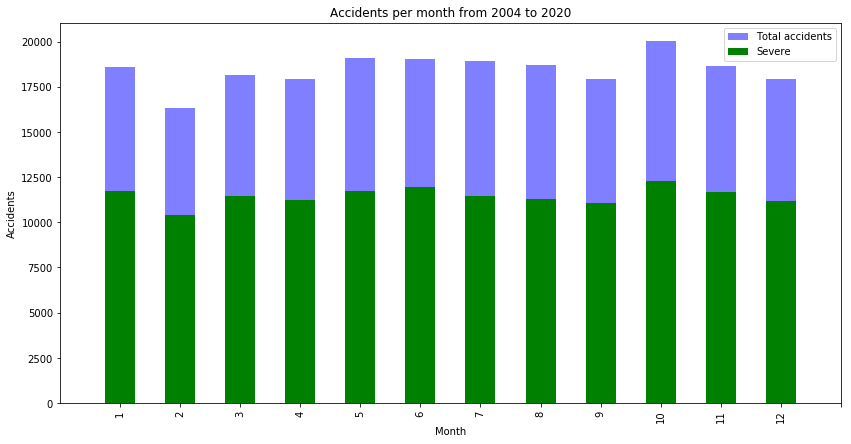

In [117]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='b', label='Total accidents')
monthly['high_sev'].plot.bar(color='g', label='Severe')

plt.title('Accidents per month from 2004 to 2020')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

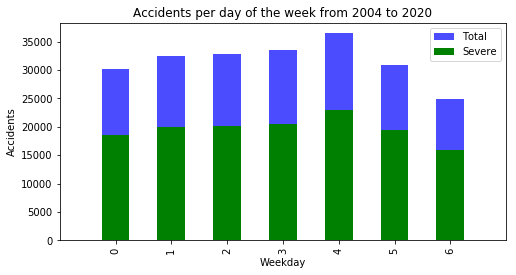

In [118]:
#By day of the week
weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='b', label='Total')
weekday['high_sev'].plot.bar(color='g', label='Severe')

plt.title('Accidents per day of the week from 2004 to 2020')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

In [119]:
#Creating day,weekday, month and year
df_cols['year'] = df_cols['INCDATE'].dt.year
df_cols['month'] = df_cols['INCDATE'].dt.month
df_cols['weekday'] = df_cols['INCDATE'].dt.weekday

In [120]:
df_cols.drop(['index','ID','INCDATE','INCDTTM'], axis=1, inplace=True)
df_cols.columns

Index(['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR', 'year', 'month', 'weekday'],
      dtype='object')

## Transforming categorical variables

In [121]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_cols["LOCATION1"] = lb_make.fit_transform(df_cols["LOCATION"])
df_cols[["LOCATION", "LOCATION1"]].head(11)

,LOCATION,LOCATION1
0,CALIFORNIA AVE SW AND SW GENESEE ST,12103
1,STONE AVE N AND N 80TH ST,22687
2,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,19684
3,25TH AVE NE AND NE 75TH ST,3974
4,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,21053
5,6TH AVE W BETWEEN W EMERSON ST AND W NICKERSON ST,9877
6,5TH AVE NE BETWEEN 130TH ST OFF RP AND NE 130T...,9287
7,3RD AVE S AND DENVER AVE S,7231
8,1ST AVE NE BETWEEN N 143RD ST AND NE 145TH ST,2526
9,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,15285


In [122]:
df_cols["COLLISIONTYPE1"] = lb_make.fit_transform(df_cols["COLLISIONTYPE"])
df_cols[["COLLISIONTYPE", "COLLISIONTYPE1"]].head(11)

,COLLISIONTYPE,COLLISIONTYPE1
0,Pedestrian,6
1,Angles,0
2,Sideswipe,9
3,Left Turn,3
4,Other,4
5,Other,4
6,Other,4
7,Other,4
8,Pedestrian,6
9,Angles,0


In [123]:
df_cols["JUNCTIONTYPE1"] = lb_make.fit_transform(df_cols["JUNCTIONTYPE"])
df_cols[["JUNCTIONTYPE", "JUNCTIONTYPE1"]].head(11)

,JUNCTIONTYPE,JUNCTIONTYPE1
0,At Intersection (intersection related),1
1,At Intersection (intersection related),1
2,Mid-Block (not related to intersection),4
3,At Intersection (intersection related),1
4,Mid-Block (but intersection related),3
5,Driveway Junction,2
6,Mid-Block (not related to intersection),4
7,At Intersection (intersection related),1
8,Mid-Block (not related to intersection),4
9,Mid-Block (but intersection related),3


In [124]:
df_cols["LIGHTCOND1"] = lb_make.fit_transform(df_cols["LIGHTCOND"])
df_cols[["LIGHTCOND", "LIGHTCOND1"]].head(11)

,LIGHTCOND,LIGHTCOND1
0,Daylight,5
1,Dark - Street Lights On,2
2,Daylight,5
3,Dark - Street Lights On,2
4,Daylight,5
5,Daylight,5
6,Dark - Street Lights On,2
7,Daylight,5
8,Dark - Street Lights On,2
9,Daylight,5


In [125]:
df_cols["ROADCOND1"] = lb_make.fit_transform(df_cols["ROADCOND"])
df_cols[["ROADCOND", "ROADCOND1"]].head(11)

,ROADCOND,ROADCOND1
0,Dry,0
1,Wet,8
2,Dry,0
3,Wet,8
4,Dry,0
5,Dry,0
6,Dry,0
7,Dry,0
8,Dry,0
9,Dry,0


In [126]:
df_cols["WEATHER1"] = lb_make.fit_transform(df_cols["WEATHER"])
df_cols[["WEATHER", "WEATHER1"]].head(11)

,WEATHER,WEATHER1
0,Clear,2
1,Raining,7
2,Clear,2
3,Raining,7
4,Clear,2
5,Clear,2
6,Clear,2
7,Clear,2
8,Clear,2
9,Clear,2


In [127]:
df_cols["HITPARKEDCAR1"] = lb_make.fit_transform(df_cols["HITPARKEDCAR"])
df_cols[["HITPARKEDCAR", "HITPARKEDCAR1"]].head(11)

,HITPARKEDCAR,HITPARKEDCAR1
0,N,0
1,N,0
2,N,0
3,N,0
4,N,0
5,N,0
6,N,0
7,N,0
8,N,0
9,N,0


### One hot encoding for ADDRTYPE

In [128]:
df_cols.ADDRTYPE.value_counts()

Block           148569
Intersection     71822
Alley              874
Name: ADDRTYPE, dtype: int64

In [129]:
df_cols=pd.concat([df_cols,pd.get_dummies(df_cols['ADDRTYPE'])], axis=1)
df_cols[['ADDRTYPE','Block','Intersection','Alley']].head()

,ADDRTYPE,Block,Intersection,Alley
0,Intersection,0,1,0
1,Intersection,0,1,0
2,Block,1,0,0
3,Intersection,0,1,0
4,Block,1,0,0


In [130]:
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['N'],0)   
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['0'],0)
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['Y'],1)
df_cols['UNDERINFL'] = df_cols['UNDERINFL'].replace(['1'],1)

In [131]:
df_cols.UNDERINFL.value_counts()

0    211636
1      9629
Name: UNDERINFL, dtype: int64

In [133]:
#Dropping the columns that have been transformed to new ones
df_cols.drop(['ADDRTYPE','LOCATION','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR'], axis=1, inplace=True)

KeyError: "['ADDRTYPE' 'LOCATION' 'COLLISIONTYPE' 'JUNCTIONTYPE' 'WEATHER' 'ROADCOND'\n 'LIGHTCOND' 'HITPARKEDCAR'] not found in axis"

In [136]:
corr = df_cols.corr()
corr.style.background_gradient(cmap='coolwarm')


,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,UNDERINFL,SEGLANEKEY,CROSSWALKKEY,year,month,weekday,LOCATION1,COLLISIONTYPE1,JUNCTIONTYPE1,LIGHTCOND1,ROADCOND1,WEATHER1,HITPARKEDCAR1,Alley,Block,Intersection
SEVERITYCODE,1,0.370575,0.260548,0.203206,0.38489,0.700391,0.280069,0.168462,0.311591,0.0966905,0.0974853,0.167778,-0.0257858,-0.00444333,0.000308089,-0.0270454,-0.0617565,-0.264412,-0.123226,0.0973057,0.0573449,-0.201678,-0.0225235,-0.193272,0.196892
PERSONCOUNT,0.370575,1,0.0116041,-0.00916478,0.558807,0.319327,0.107266,0.0463413,0.008312,0.0538994,-0.00834905,-0.0102738,-0.0673016,-0.00767659,0.0552597,-0.0123105,0.0375634,-0.15276,-0.0858907,0.0770512,0.0528063,-0.11906,-0.0244881,-0.0841446,0.0876876
PEDCOUNT,0.260548,0.0116041,1,-0.0158227,-0.154356,0.167294,0.132543,0.0728061,0.260955,0.0319634,0.00126502,0.553888,0.0214149,0.00431671,-0.0176523,-0.0361607,0.102328,-0.128913,-0.0532116,0.0197047,0.00320965,-0.0437938,0.0020348,-0.144518,0.144696
PEDCYLCOUNT,0.203206,-0.00916478,-0.0158227,1,-0.15074,0.122495,0.0620951,0.0110157,0.369044,-0.0126391,0.456218,0.10378,0.0276288,0.00518652,-0.0235545,-0.0189904,-0.215409,-0.0939488,0.00502127,-0.0361814,-0.0393614,-0.0365627,-0.00694962,-0.087084,0.0882867
VEHCOUNT,0.38489,0.558807,-0.154356,-0.15074,1,0.142673,-0.00306759,-0.0106176,-0.0785456,0.0507102,-0.0752901,-0.120686,-0.108892,-0.0104186,0.017723,0.00448877,0.113219,-0.0859161,-0.0688841,0.173137,0.182701,-0.123492,-0.0208688,1.69995e-05,0.0027786
INJURIES,0.700391,0.319327,0.167294,0.122495,0.142673,1,0.279368,0.0671804,0.138528,0.0641258,0.0593988,0.100689,-0.00442378,0.000967585,0.00840898,-0.0273793,-0.104717,-0.193834,-0.0751511,-0.00178518,-0.0490784,-0.106276,-0.0227097,-0.166582,0.170144
SERIOUSINJURIES,0.280069,0.107266,0.132543,0.0620951,-0.00306759,0.279368,1,0.173007,0.0866685,0.0472939,0.0315772,0.0559026,-0.00503714,-0.00069574,0.00351161,-0.00324572,-0.0236771,-0.03328,-0.0299769,-0.00593351,-0.0133418,-0.02004,-0.00376006,-0.0341676,0.0347779
FATALITIES,0.168462,0.0463413,0.0728061,0.0110157,-0.0106176,0.0671804,0.173007,1,0.0458338,0.0431549,0.00511154,0.0318511,-0.00087498,0.00441976,0.0045957,0.000387719,-0.00183166,-0.00752107,-0.0177534,-0.00732513,-0.0081717,-0.0090251,-0.0023759,-0.00815805,0.00850179
SDOT_COLCODE,0.311591,0.008312,0.260955,0.369044,-0.0785456,0.138528,0.0866685,0.0458338,1,0.115384,0.202098,0.187266,-0.0846856,0.00671416,0.0162656,0.0306835,0.00892772,-0.15698,-0.174937,0.018023,-0.0429878,-0.158467,-0.0879492,-0.00487136,0.0166685
UNDERINFL,0.0966905,0.0538994,0.0319634,-0.0126391,0.0507102,0.0641258,0.0472939,0.0431549,0.115384,1,-0.00595666,-0.00407634,-0.0139701,0.0010763,0.0732051,0.0069568,0.00761879,0.0225128,-0.225657,0.00582948,-0.0226485,-0.00980709,0.0014004,0.0335608,-0.0338531


In [137]:
df_cols.dtypes

SEVERITYCODE         int64
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
SDOT_COLCODE       float64
UNDERINFL            int64
ST_COLCODE          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
year                 int64
month                int64
weekday              int64
LOCATION1            int64
COLLISIONTYPE1       int64
JUNCTIONTYPE1        int64
LIGHTCOND1           int64
ROADCOND1            int64
WEATHER1             int64
HITPARKEDCAR1        int64
Alley                uint8
Block                uint8
Intersection         uint8
dtype: object

In [138]:
df_cols.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'SDOT_COLCODE',
       'UNDERINFL', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'year',
       'month', 'weekday', 'LOCATION1', 'COLLISIONTYPE1', 'JUNCTIONTYPE1',
       'LIGHTCOND1', 'ROADCOND1', 'WEATHER1', 'HITPARKEDCAR1', 'Alley',
       'Block', 'Intersection'],
      dtype='object')

In [139]:
Features = df_cols[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',  'COLLISIONTYPE1', 'JUNCTIONTYPE1', 'WEATHER1', 'HITPARKEDCAR1']]

## Feature selection

In [140]:
X = Features
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,COLLISIONTYPE1,JUNCTIONTYPE1,WEATHER1,HITPARKEDCAR1
0,2,1,0,1,0,0,24.0,0,0,6,1,2,0
1,4,0,0,2,0,0,11.0,0,0,0,1,7,0
2,4,0,0,0,0,0,14.0,0,0,9,4,2,0
3,2,0,0,0,0,0,11.0,0,0,3,1,7,0
4,0,0,0,0,0,0,11.0,0,0,4,3,2,0


In [141]:
y = df_cols['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 0])

## Normalize data

In [142]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.1538605 ,  4.76787372, -0.16605783,  0.85530177, -0.0959373 ,
        -0.03772846,  1.45372601, -0.08047239, -0.13409996,  0.59927618,
        -1.24900156, -0.66168085, -0.23921185],
       [ 1.20634662, -0.18886993, -0.16605783,  2.22126215, -0.0959373 ,
        -0.03772846, -0.32637905, -0.08047239, -0.13409996, -1.69587373,
        -1.24900156,  1.15780128, -0.23921185],
       [ 1.20634662, -0.18886993, -0.16605783, -0.51065861, -0.0959373 ,
        -0.03772846,  0.08441442, -0.08047239, -0.13409996,  1.74685113,
         0.70988472, -0.66168085, -0.23921185],
       [-0.1538605 , -0.18886993, -0.16605783, -0.51065861, -0.0959373 ,
        -0.03772846, -0.32637905, -0.08047239, -0.13409996, -0.54829878,
        -1.24900156,  1.15780128, -0.23921185],
       [-1.51406762, -0.18886993, -0.16605783, -0.51065861, -0.0959373 ,
        -0.03772846, -0.32637905, -0.08047239, -0.13409996, -0.16577379,
         0.05692263, -0.66168085, -0.23921185]])

# Model development

Here 5 classification models will be fit and compared. These include

1. KNN
2. Decision Tree
3. SVM
4. Logistic Regression
5. Random Forests

The models will be evaluated to select the best classifier

In [143]:
# Evaluation Metrices
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss

In [144]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify=y)

## KNN

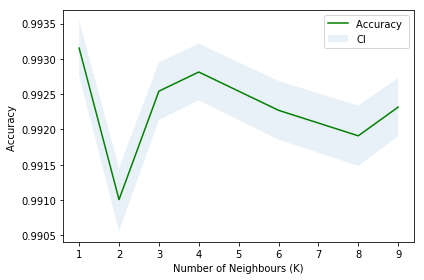

The best accuracy was with 0.9931530065758254 with k= 1


In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Using different Ks, Training and prediction
Ks = 10
meanAcc = np.zeros((Ks-1))
stdAcc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    meanAcc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    stdAcc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

meanAcc

plt.plot(range(1,Ks),meanAcc,'g')
plt.fill_between(range(1,Ks),meanAcc - 1 * stdAcc,meanAcc + 1 * stdAcc, alpha=0.10)
plt.legend(('Accuracy ', 'CI'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", meanAcc.max(), "with k=", meanAcc.argmax()+1) 


In [157]:
# train model with k=1
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
neigh

predKNN=neigh.predict(X_test)

In [158]:
from sklearn.metrics import classification_report,confusion_matrix

print('CONFUSION_MATRIX :\n')
print(confusion_matrix(predKNN,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(predKNN,y_test))
    
print('ACCURACY :')
metrics.accuracy_score(predKNN,y_test)

CONFUSION_MATRIX :

[[ 4214   167     0     0     0]
 [  113 27324     6     0     0]
 [    0     6 11729     7     0]
 [    0     0     4   613     0]
 [    0     0     0     0    70]]


REPORT :

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4381
           1       0.99      1.00      0.99     27443
           2       1.00      1.00      1.00     11742
           3       0.99      0.99      0.99       617
           4       1.00      1.00      1.00        70

   micro avg       0.99      0.99      0.99     44253
   macro avg       0.99      0.99      0.99     44253
weighted avg       0.99      0.99      0.99     44253

ACCURACY :


0.9931530065758254

## Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier

loansTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

loansTree.fit(X_train,y_train)

predDT = loansTree.predict(X_test)
predDT

array([1, 2, 1, ..., 1, 2, 2])

In [160]:
from sklearn.metrics import classification_report,confusion_matrix
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(predDT,y_test))

CONFUSION_MATRIX :

[[ 4112   185     0     0     0]
 [  215 27312     0     1    18]
 [    0     0 11739     7     0]
 [    0     0     0   612     0]
 [    0     0     0     0    52]]


In [161]:
print('REPORT :\n')
print(classification_report(predDT,y_test))

print('ACCURACY :\n')
metrics.accuracy_score(predDT,y_test)

REPORT :

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4297
           1       0.99      0.99      0.99     27546
           2       1.00      1.00      1.00     11746
           3       0.99      1.00      0.99       612
           4       0.74      1.00      0.85        52

   micro avg       0.99      0.99      0.99     44253
   macro avg       0.93      0.99      0.96     44253
weighted avg       0.99      0.99      0.99     44253

ACCURACY :



0.9903735339976951

## SVM

In [162]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

predSVM = clf.predict(X_test)
predSVM

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 2, 1, ..., 1, 2, 2])

In [163]:
from sklearn.metrics import classification_report,confusion_matrix
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(predSVM,y_test))

CONFUSION_MATRIX :

[[ 4253   302     0     0     0]
 [   73 27193     1     0     0]
 [    1     2 11738     9     8]
 [    0     0     0   611     0]
 [    0     0     0     0    62]]


In [164]:
print('REPORT :\n')
print(classification_report(predSVM,y_test))

print('ACCURACY :\n')
metrics.accuracy_score(predSVM,y_test)

REPORT :

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      4555
           1       0.99      1.00      0.99     27267
           2       1.00      1.00      1.00     11758
           3       0.99      1.00      0.99       611
           4       0.89      1.00      0.94        62

   micro avg       0.99      0.99      0.99     44253
   macro avg       0.97      0.99      0.98     44253
weighted avg       0.99      0.99      0.99     44253

ACCURACY :



0.9910514541387024

## Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(C=0.01).fit(X_train,y_train)
logR

predLR=logR.predict(X_test)
predLR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([1, 2, 1, ..., 1, 2, 2])

In [166]:
print('CONFUSION_MATRIX :\n')

print(confusion_matrix(predLR,y_test))

CONFUSION_MATRIX :

[[ 3807   625     0     0     0]
 [  520 26872    22     1     0]
 [    0     0 11717    19     1]
 [    0     0     0   600     0]
 [    0     0     0     0    69]]


In [167]:
print('REPORT :\n')
print(classification_report(predLR,y_test))

print('ACCURACY :\n')
metrics.accuracy_score(predLR,y_test)

REPORT :

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4432
           1       0.98      0.98      0.98     27415
           2       1.00      1.00      1.00     11737
           3       0.97      1.00      0.98       600
           4       0.99      1.00      0.99        69

   micro avg       0.97      0.97      0.97     44253
   macro avg       0.96      0.97      0.96     44253
weighted avg       0.97      0.97      0.97     44253

ACCURACY :



0.9731543624161074

## Model Evaluation

In [168]:
#Jaccard index

#KNN
knn_yhat = neigh.predict(X_test)
jc1 = (jaccard_similarity_score(y_test, knn_yhat))

#Decision Tree
dt_yhat = loansTree.predict(X_test)
jc2 = (jaccard_similarity_score(y_test, dt_yhat))

#SVM
svm_yhat = clf.predict(X_test)
jc3 = (jaccard_similarity_score(y_test, svm_yhat))

#Logistic Regression
lr_yhat = logR.predict(X_test)
jc4 = (jaccard_similarity_score(y_test, lr_yhat))

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.9931530065758254,
 0.9903735339976951,
 0.9910514541387024,
 0.9731543624161074]

In [171]:
#F1 score

#KNN
fs1 = (f1_score(y_test, knn_yhat,average='weighted'))

#Desision Tree
fs2 = (f1_score(y_test, dt_yhat, average='weighted'))

#SVM
fs3 = (f1_score(y_test, svm_yhat, average='weighted'))

#Logistic Regression
fs4 = (f1_score(y_test, lr_yhat, average='weighted'))

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.9931691138623527, 0.990331457011904, 0.9911365407225687, 0.9732859135904506]

In [172]:
##log loss

LR_yhat_prob = logR.predict_proba(X_test)

list_ll = ['NA', 'NA', 'NA',(log_loss(y_test, LR_yhat_prob))]
list_ll

['NA', 'NA', 'NA', 0.0914651425853468]

## Report

In [173]:
df = pd.DataFrame( list_jc,index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.993153,0.993169,NA
Decision Tree,0.990374,0.990331,NA
SVM,0.991051,0.991137,NA
Logistic Regression,0.973154,0.973286,0.0914651
